In [7]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('dataset_final.csv')


In [9]:
data.describe()

,Time,Temperature,Humidity,Air Quality,Light,Loudness
count,6.558000e+03,6558.000000,6558.000000,6558.0,6558.000000,6558.000000
mean,1.623814e+09,27.549703,55.144913,75.0,631.581885,153.990851
std,1.893276e+04,6.202954,12.115001,0.0,6.857017,30.629140
min,1.623781e+09,22.190000,1.940000,75.0,625.000000,31.000000
25%,1.623798e+09,24.090000,53.455000,75.0,627.000000,138.000000
50%,1.623814e+09,25.000000,60.120000,75.0,629.000000,150.000000
75%,1.623830e+09,28.250000,63.380000,75.0,633.000000,163.000000
max,1.623847e+09,72.280000,71.810000,75.0,675.000000,498.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         6558 non-null   int64  
 1   Temperature  6558 non-null   float64
 2   Humidity     6558 non-null   float64
 3   Air Quality  6558 non-null   int64  
 4   Light        6558 non-null   int64  
 5   Loudness     6558 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 307.5 KB


In [15]:
data.head()

,Time,Temperature,Humidity,Air Quality,Light,Loudness
0,1623781306,37.94,28.94,75,644,106
1,1623781316,37.94,29.00,75,645,145
2,1623781326,37.88,28.88,75,644,146
3,1623781336,37.72,28.94,75,646,139
4,1623781346,37.69,29.19,75,644,155


In [19]:
# Process the data (e.g., handle missing values, convert data types)
data.dropna(inplace=True)  # remove rows with missing values
data['Air Quality'] = data['Air Quality'].astype(float)  # convert column to float
data['Light'] = data['Light'].astype(float)  # convert column to float
data['Loudness'] = data['Loudness'].astype(float)  # convert column to float

In [21]:
data.head()

,Time,Temperature,Humidity,Air Quality,Light,Loudness
0,1623781306,37.94,28.94,75.0,644.0,106.0
1,1623781316,37.94,29.00,75.0,645.0,145.0
2,1623781326,37.88,28.88,75.0,644.0,146.0
3,1623781336,37.72,28.94,75.0,646.0,139.0
4,1623781346,37.69,29.19,75.0,644.0,155.0


In [27]:
import datetime

data['Time'] = data['Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data.head()

,Time,Temperature,Humidity,Air Quality,Light,Loudness
0,2021-06-15 22:21:46,37.94,28.94,75.0,644.0,106.0
1,2021-06-15 22:21:56,37.94,29.00,75.0,645.0,145.0
2,2021-06-15 22:22:06,37.88,28.88,75.0,644.0,146.0
3,2021-06-15 22:22:16,37.72,28.94,75.0,646.0,139.0
4,2021-06-15 22:22:26,37.69,29.19,75.0,644.0,155.0


In [29]:
anomaly_points = [
        ["2021-06-15 18:21:46","2021-06-15 19:37:16"],
        ["2021-06-16 02:26:36","2021-06-16 04:15:56"],
        ["2021-06-16 08:54:46","2021-06-16 10:45:36"]
]

In [33]:
data['anomaly'] = 0
for start, end in anomaly_points:
    data.loc[((data['Time'] >= start) & (data['Time'] <= end)), 'anomaly'] = 1
data.head()

,Time,Temperature,Humidity,Air Quality,Light,Loudness,anomaly
0,2021-06-15 22:21:46,37.94,28.94,75.0,644.0,106.0,0
1,2021-06-15 22:21:56,37.94,29.00,75.0,645.0,145.0,0
2,2021-06-15 22:22:06,37.88,28.88,75.0,644.0,146.0,0
3,2021-06-15 22:22:16,37.72,28.94,75.0,646.0,139.0,0
4,2021-06-15 22:22:26,37.69,29.19,75.0,644.0,155.0,0


In [35]:
data['year'] = data['Time'].apply(lambda x : x.year)
data['month'] = data['Time'].apply(lambda x : x.month)
data['day'] = data['Time'].apply(lambda x : x.day)
data['hour'] = data['Time'].apply(lambda x : x.hour)
data['minute'] = data['Time'].apply(lambda x : x.minute)
data.head()

,Time,Temperature,Humidity,Air Quality,Light,Loudness,anomaly,year,month,day,hour,minute
0,2021-06-15 22:21:46,37.94,28.94,75.0,644.0,106.0,0,2021,6,15,22,21
1,2021-06-15 22:21:56,37.94,29.00,75.0,645.0,145.0,0,2021,6,15,22,21
2,2021-06-15 22:22:06,37.88,28.88,75.0,644.0,146.0,0,2021,6,15,22,22
3,2021-06-15 22:22:16,37.72,28.94,75.0,646.0,139.0,0,2021,6,15,22,22
4,2021-06-15 22:22:26,37.69,29.19,75.0,644.0,155.0,0,2021,6,15,22,22


In [39]:
data.index = data['Time']
data.drop(['Time'], axis=1, inplace=True)
data.head()

,Temperature,Humidity,Air Quality,Light,Loudness,anomaly,year,month,day,hour,minute
Time,,,,,,,,,,,
2021-06-15 22:21:46,37.94,28.94,75.0,644.0,106.0,0,2021,6,15,22,21
2021-06-15 22:21:56,37.94,29.00,75.0,645.0,145.0,0,2021,6,15,22,21
2021-06-15 22:22:06,37.88,28.88,75.0,644.0,146.0,0,2021,6,15,22,22
2021-06-15 22:22:16,37.72,28.94,75.0,646.0,139.0,0,2021,6,15,22,22
2021-06-15 22:22:26,37.69,29.19,75.0,644.0,155.0,0,2021,6,15,22,22


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the AI model (e.g., autoencoder for anomaly detection)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(data.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(data.shape[1], activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(data,data, epochs=100, batch_size=32, validation_data=(data, data))

# Use the model to detect anomalies (e.g., using reconstruction error)
def detect_anomaly(x):
    reconstruction = model.predict(x)
    error = np.mean(np.square(x - reconstruction), axis=1)
    threshold = 3  # adjust the threshold value
    return error > threshold

anomaly_scores = detect_anomaly(data)
anomaly_scores

Epoch 1/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 410733.5625 - val_loss: 410675.5000
Epoch 2/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 410651.8125 - val_loss: 410657.6562
Epoch 3/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 410651.8750 - val_loss: 410657.6562
Epoch 4/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 410646.7812 - val_loss: 410657.6562
Epoch 5/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 410653.1250 - val_loss: 410657.6562
Epoch 6/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 410653.2812 - val_loss: 410657.6562
Epoch 7/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 410635.3750 - val_loss: 410657.6562
Epoch 8/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 410684.1562 - val_loss: 410657.6562
Epoch 9/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 410626.9062 - val_loss: 410657.6562
Epoch 10/100
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 410654.8125 - val_loss: 410657.6562
Epoch 11/100
205/205 ━━━━━━━━

Time
2021-06-15 22:21:46    True
2021-06-15 22:21:56    True
2021-06-15 22:22:06    True
2021-06-15 22:22:16    True
2021-06-15 22:22:26    True
                       ... 
2021-06-16 16:33:56    True
2021-06-16 16:34:06    True
2021-06-16 16:34:16    True
2021-06-16 16:34:26    True
2021-06-16 16:34:36    True
Length: 6558, dtype: bool

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset (e.g., MNIST)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape the data to 4D tensors (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN Autoencoder model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7*7*64, activation='relu'),
    keras.layers.Reshape((7, 7, 64)),
    keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
    keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, X_train, epochs=10, 
                    validation_data=(X_val, X_val), 
                    verbose=2)

# Evaluate the model on the test set
mse = model.evaluate(X_test, X_test)
print(f'Test MSE: {mse:.3f}')

# Use the model to detect anomalies
def detect_anomaly(x, threshold=0.5):
    x_reconstructed = model.predict(x)
    mse = np.mean((x - x_reconstructed) ** 2)
    return mse > threshold

# Test the anomaly detection function
X_anomaly = X_test[:10]  # select a few test images as anomalies
y_pred = [detect_anomaly(x) for x in X_anomaly]
print(y_pred)  # should output [True, True,..., True]

# Visualize the reconstructed images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_anomaly[i].reshape(28, 28), cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(model.predict(X_anomaly[i].reshape(1, 28, 28, 1))[0].reshape(28, 28), cmap='gray')
    plt.title(f'Reconstructed {i+1}')
    plt.axis('off')
plt.show()

Epoch 1/10
1500/1500 - 62s - 41ms/step - loss: 0.0203 - val_loss: 0.0076
Epoch 2/10
1500/1500 - 58s - 39ms/step - loss: 0.0063 - val_loss: 0.0055
Epoch 3/10
1500/1500 - 58s - 39ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 4/10
1500/1500 - 58s - 39ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 5/10
1500/1500 - 56s - 37ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/10
1500/1500 - 58s - 39ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/10
1500/1500 - 60s - 40ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 8/10
1500/1500 - 62s - 42ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/10
1500/1500 - 57s - 38ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 10/10
1500/1500 - 56s - 38ms/step - loss: 0.0027 - val_loss: 0.0027
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0027
Test MSE: 0.003


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 3 from 1 for '{{node sequential_7_1/conv2d_8_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_7_1/ExpandDims, sequential_7_1/conv2d_8_1/convolution/ReadVariableOp)' with input shapes: [28,28,1,1], [3,3,1,32].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(28, 28, 1, 1), dtype=float32)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 - 67s - 45ms/step - loss: 0.0201 - val_loss: 0.0077
Epoch 2/10
1500/1500 - 60s - 40ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 3/10
1500/1500 - 69s - 46ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 4/10
1500/1500 - 66s - 44ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 5/10
1500/1500 - 78s - 52ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/10
1500/1500 - 96s - 64ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/10
1500/1500 - 65s - 43ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/10
1500/1500 - 106s - 71ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/10
1500/1500 - 97s - 64ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 10/10
1500/1500 - 95s - 63ms/step - loss: 0.0027 - val_loss: 0.0027
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0026
Test MSE: 0.003
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[False False False False False False False False False False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


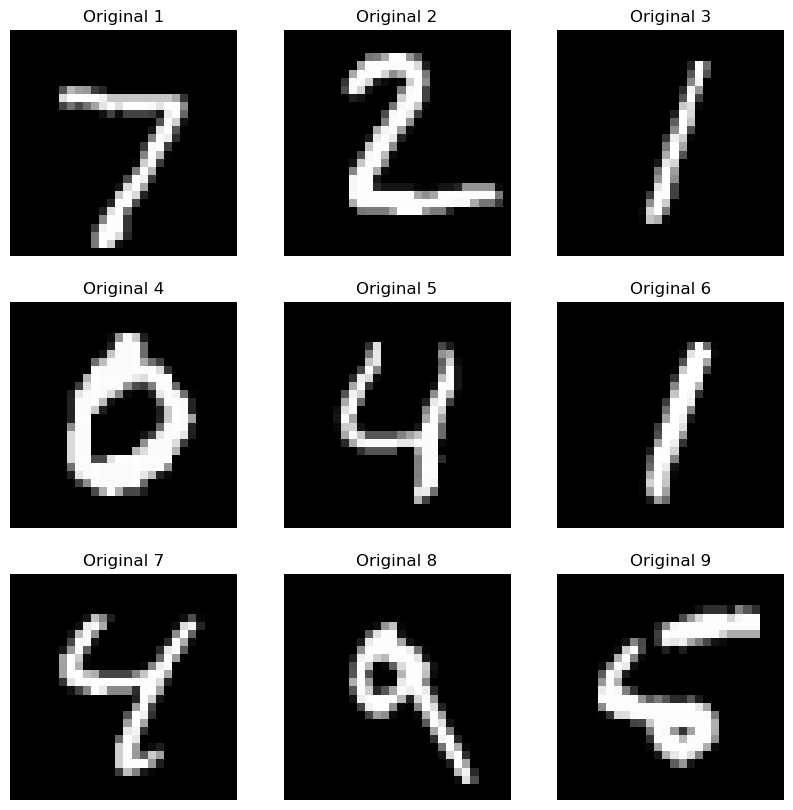

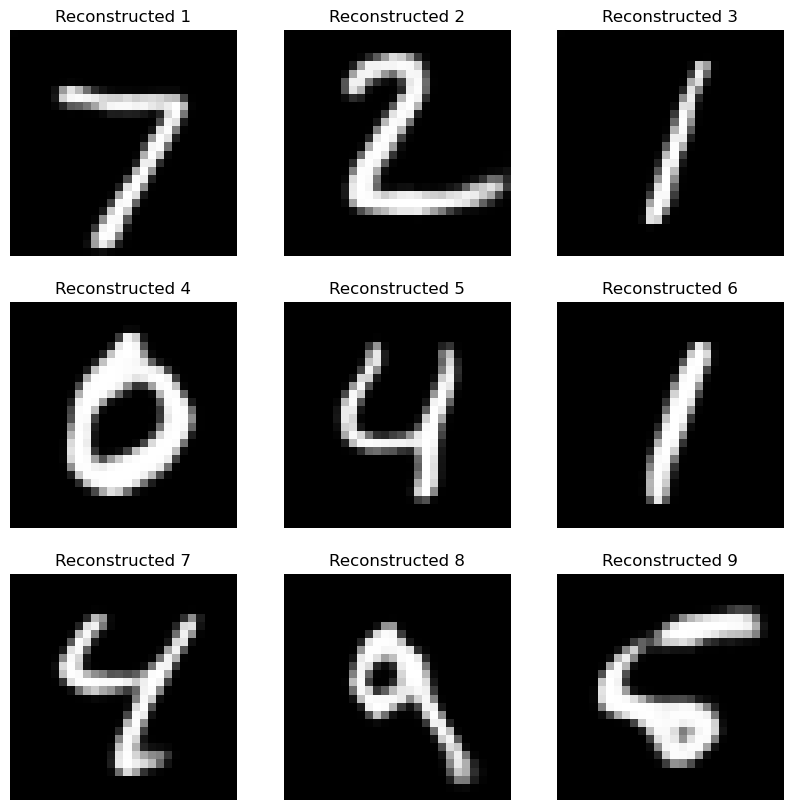

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset (e.g., MNIST)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape the data to 4D tensors (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN Autoencoder model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7*7*64, activation='relu'),
    keras.layers.Reshape((7, 7, 64)),
    keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
    keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, X_train, epochs=10, 
                    validation_data=(X_val, X_val), 
                    verbose=2)

# Evaluate the model on the test set
mse = model.evaluate(X_test, X_test)
print(f'Test MSE: {mse:.3f}')

# Use the model to detect anomalies
def detect_anomaly(x, threshold=0.02):
    x_reconstructed = model.predict(x)
    mse = np.mean(np.square(x - x_reconstructed), axis=(1, 2, 3))
    return mse > threshold

# Test the anomaly detection function
X_anomaly = X_test[:10]  # select a few test images as anomalies
y_pred = detect_anomaly(X_anomaly)
print(y_pred)  # should output [True, True,..., True] if all are detected as anomalies

# Visualize the original and reconstructed images
def visualize_reconstructions(original, reconstructed, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        # Original images
        plt.subplot(3, 3, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title(f'Original {i + 1}')
        plt.axis('off')

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        # Reconstructed images
        plt.subplot(3, 3, i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title(f'Reconstructed {i + 1}')
        plt.axis('off')
    plt.show()

reconstructed = model.predict(X_anomaly)
visualize_reconstructions(X_anomaly, reconstructed)
